In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['target'] = iris.target #append target column to df

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris.target_names #what does target values [0,1,2] represent

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

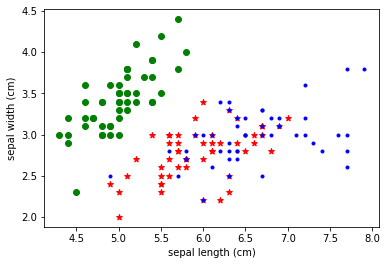

In [36]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='*')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='.')

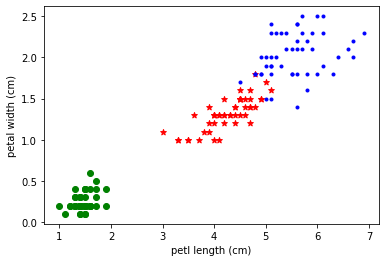

In [37]:
plt.xlabel('petl length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='*')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='.')

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X=df.drop(['target','flower_name'],axis='columns')

In [66]:
y=df.target

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [73]:
from sklearn.svm import SVC

In [74]:
model=SVC(kernel='linear')

In [75]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [76]:
model.score(X_test,y_test)

1.0

In [77]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)


Text(69.0, 0.5, 'Truth')

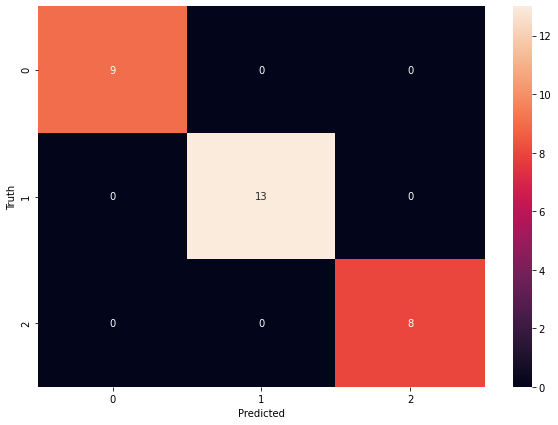

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')